# Zastosowania DFT
## Anaiza obrazow

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.ndimage import zoom


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.1415925..3.1415925].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..7.034896].


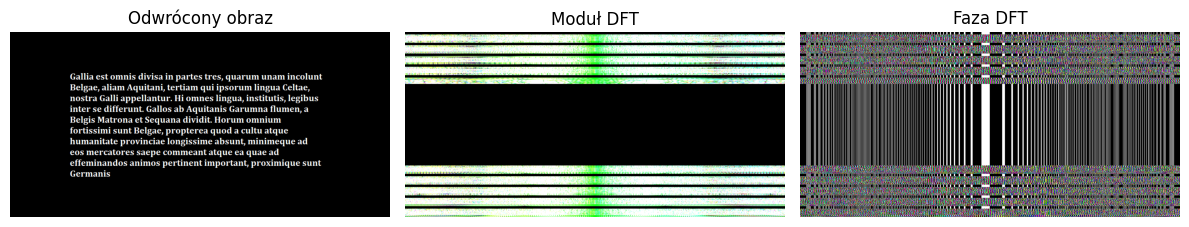

In [83]:

# Wczytanie obrazu
galia = imread('galia.png')

if galia.ndim == 3:  # Jeśli obraz jest kolorowy, konwertujemy na skalę szarości
    image = np.mean(galia, axis=2)


# Odwrócenie kolorów
inverted_image = 1 - galia

# Transformacja DFT
dft_result = np.fft.fft2(inverted_image)
dft_shifted = np.fft.fftshift(dft_result)  # Przesunięcie zerowej częstotliwości do środka

# Obliczenie modułu i fazy
magnitude = np.abs(dft_shifted)
phase = np.angle(dft_shifted)

# Wizualizacja
plt.figure(figsize=(12, 6))

# Oryginalny obraz
plt.subplot(1, 3, 1)
plt.title("Odwrócony obraz")
plt.imshow(inverted_image, cmap='gray')
plt.axis('off')

# Faza
plt.subplot(1, 3, 3)
plt.title("Faza DFT")
plt.imshow(phase, cmap='gray')
plt.axis('off')

# Moduł
plt.subplot(1, 3, 2)
plt.title("Moduł DFT")
plt.imshow(np.log(1 + magnitude), cmap='gray')  # Logarytm dla lepszej widoczności
plt.axis('off')

plt.tight_layout()
plt.show()

Liczba wystąpień wzorca: 43


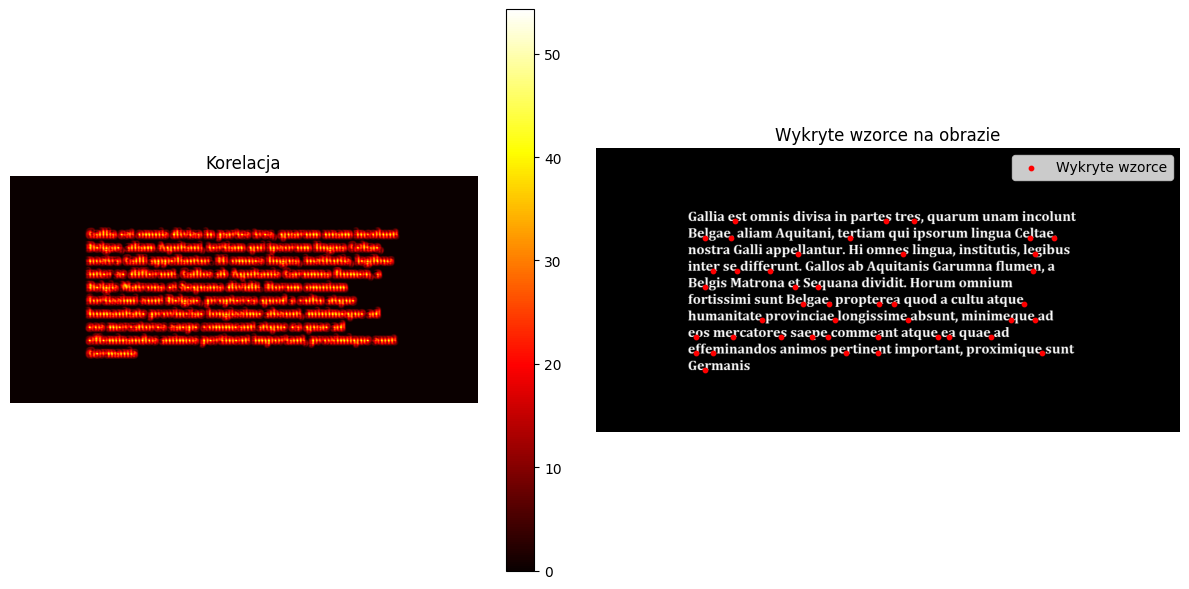

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

galia = 1 - imread('galia.png')
galia_e = 1 - imread('galia_e.png')

if galia.ndim == 3:
    galia = np.mean(galia, axis=2)
if galia_e.ndim == 3:
    galia_e = np.mean(galia_e, axis=2)

h, w = galia.shape

# Obrót wzorca o 180 stopni
rotated_imp = np.rot90(galia_e, 2)

# Transformacja Fouriera obrazu i wzorca
fft_galia = np.fft.fft2(galia)
fft_imp = np.fft.fft2(rotated_imp, s=(h, w))  # Dopasowanie rozmiaru wzorca do obrazu

# Obliczenie korelacji w dziedzinie częstotliwości
correlation = np.real(np.fft.ifft2(fft_galia * fft_imp))

# Próg dla wykrycia wzorca
threshold = 0.9 * np.max(correlation)
points = np.argwhere(correlation >= threshold)  # Współrzędne punktów

# Liczba wystąpień wzorca
pattern_count = len(points)
print(f"Liczba wystąpień wzorca: {pattern_count}")

# Wizualizacja korelacji
plt.figure(figsize=(12, 6))

# Korelacja
plt.subplot(1, 2, 1)
plt.title("Korelacja")
plt.imshow(correlation, cmap='hot')
plt.colorbar()
plt.axis('off')

# Oryginalny obraz z nałożonymi punktami
plt.subplot(1, 2, 2)
plt.title("Wykryte wzorce na obrazie")
plt.imshow(galia, cmap='gray')
plt.scatter(points[:, 1], points[:, 0], color='red', s=10, label='Wykryte wzorce')  # Nałożenie punktów
plt.legend()
plt.axis('off')

plt.tight_layout()
plt.show()

Liczba wystąpień wzorca: 13759


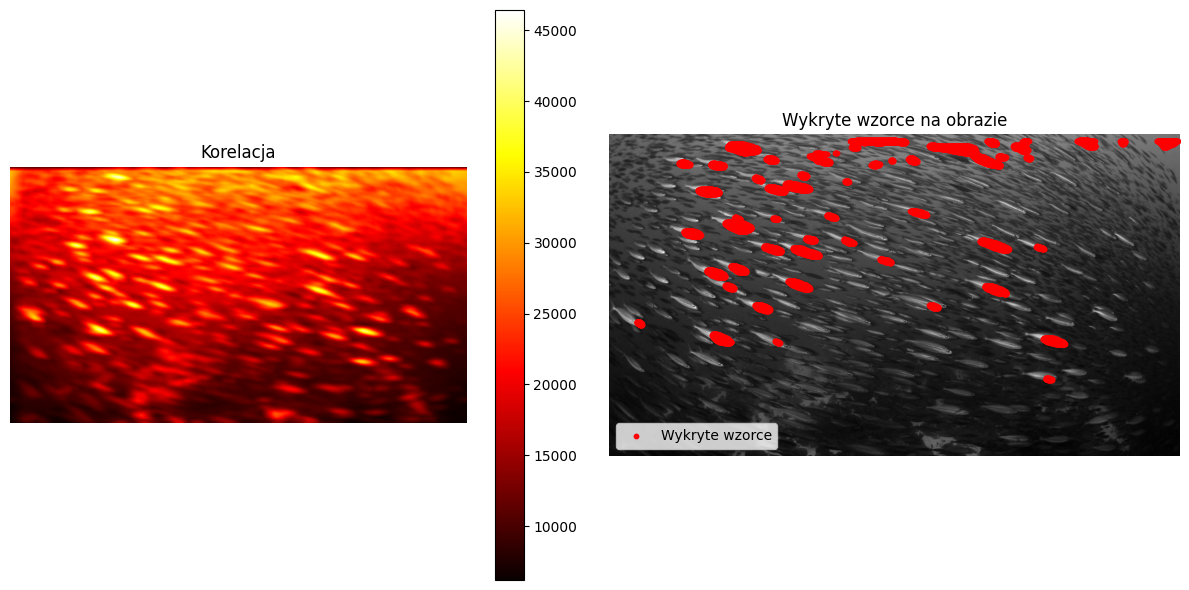

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

galia = imread('school.jpg')
galia_e = imread('fish1.png')


if galia.ndim == 3:
    galia = np.mean(galia, axis=2)
if galia_e.ndim == 3:
    galia_e = np.mean(galia_e, axis=2)

h, w = galia.shape

# Obrót wzorca o 180 stopni
rotated_imp = np.rot90(galia_e, 2)

# Transformacja Fouriera obrazu i wzorca
fft_galia = np.fft.fft2(galia)
fft_imp = np.fft.fft2(rotated_imp, s=(h, w))  # Dopasowanie rozmiaru wzorca do obrazu

# Obliczenie korelacji w dziedzinie częstotliwości
correlation = np.real(np.fft.ifft2(fft_galia * fft_imp))


threshold = 0.7 * np.max(correlation)  # Próg dla wykrycia wzorca
points = np.argwhere(correlation >= threshold)  # Współrzędne punktów

# Liczba wystąpień wzorca
pattern_count = len(points)
print(f"Liczba wystąpień wzorca: {pattern_count}")

# Wizualizacja korelacji
plt.figure(figsize=(12, 6))

# Korelacja
plt.subplot(1, 2, 1)
plt.title("Korelacja")
plt.imshow(correlation, cmap='hot')
plt.colorbar()
plt.axis('off')

# Oryginalny obraz z nałożonymi punktami
plt.subplot(1, 2, 2)
plt.title("Wykryte wzorce na obrazie")
plt.imshow(galia, cmap='gray')
plt.scatter(points[:, 1], points[:, 0], color='red', s=10, label='Wykryte wzorce')  # Nałożenie punktów
plt.legend()
plt.axis('off')

plt.tight_layout()
plt.show()